In [2]:
import scipy.io
import numpy as np
import sympy as sm
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [3]:
diag1scan = loadmat('diag1scan.mat')['diag1scan']
diag2scan = loadmat('diag2scan.mat')['diag2scan']
colscan = loadmat('colscan.mat')['colscan']
rowscan = loadmat('rowscan.mat')['rowscan']
std = loadmat('std.mat')['std']

## (A) Inversion using the row and column scan travel times 

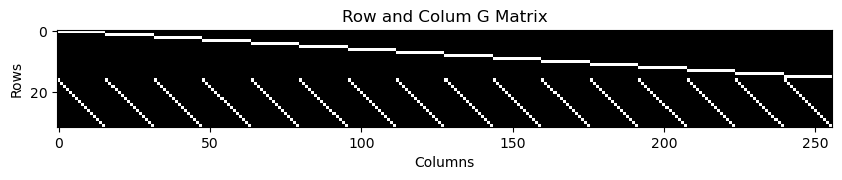

In [4]:
# #================ travel time measurements
d = np.concatenate((colscan[:, 4], rowscan[:, 4]),axis = 0).T

#================= G matrix initialization
G = np.zeros((32, 256))

#================= column scan
for i in range(16):
    for j in range(i*16,i*16+16):
        G[i,j] = 1

#================== row scan
for i in range(16):
    for j in range(i,240+i+1,16):
        G[i+16,j] = 1  
        
#================== Plotting the G matrix
plt.figure(figsize=(10, 4))
plt.imshow(G,cmap="gist_heat")
plt.title("Row and Colum G Matrix")
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### (a) Rank and Dimension 

In [4]:
#================ rank of G and Dimension of d 
len_d = len(d)
print('Rank of G matrix is:', np.linalg.matrix_rank(G))
print('Dimension of G matrix is:',  (G.shape))
print('Dimension of data space is: %s' % (len_d))

Rank of G matrix is: 31
Dimension of G matrix is: (32, 256)
Dimension of data space is: 32


- The rank of `32 x 256` element `G` matrix is `31`. Hence, the matrix `G` is rank deficient.

### b) (i)

### Significance of the elements and dimensiom of the data and model null spaces.  Plot and interpret at least one element of each space.

In [5]:
#================ SVD of G
u, s, vh = np.linalg.svd(G, full_matrices= True)
vh = vh.T
#================ P and null spaces from u, s and vh
p = np.linalg.matrix_rank(np.diag(s))
n, m = G.shape
up = u[:, :p]
vp = vh[:,:p]
lamp = np.diag(s[:p])
lamp.shape

(31, 31)

In [6]:
# #================ Largest and Smallest Singular Values 
# print('vp: %s' % vp)
# print('up: %s' % up)
# print('lamp: %s' % lamp)

In [7]:
#================ Largest and Smallest Singular Values 
print('Smallest singular value: %s' % np.diag(lamp).min())
print('Largest singular value: %s' % np.diag(lamp).max())

Smallest singular value: 3.999999999999995
Largest singular value: 5.6568542494923815


In [8]:
#================ dimension of P space
print('Dimension of P space: %s' % (p))

#================ dimension of data null space 
print('Dimension of data null space: %s' % (len_d - p))

#================ dimension of model null space 
print('Dimension of model null space: %s' % (m - p))

Dimension of P space: 31
Dimension of data null space: 1
Dimension of model null space: 225


`Significance`: Null space is important in inverse problems because the existence of nontrivial null space results in the existence of nonunique solutions. Both the model null space and the data null space in our scenario are not empty.
- Model Null Space (`N(G)`): The set of all vectors with `m` such that `Gm = 0` is known as model null space (`N(G)`). The existence of vectors other than the zero vector (`m = 0`) that perfectly fit the trivial data (`d = 0`) indicates that the model null space is not trivial.

- Data Null Space (`N(G.T)`): A collection of vectors `d` that do not affect `m` constitute the data null space. So, whenever a nontrivial (non-empty) data null space exists, it indicates that additional data exist that will result in the same model parameters.

- The data null space is 1-dimensional. Hence, there exists 1 vector $\mathbf{u}$. $\mathbf{u}_{.,32}$ not in the column space of `G` matrix. This vector denote the projections of the data that cannot be fitted by any model.

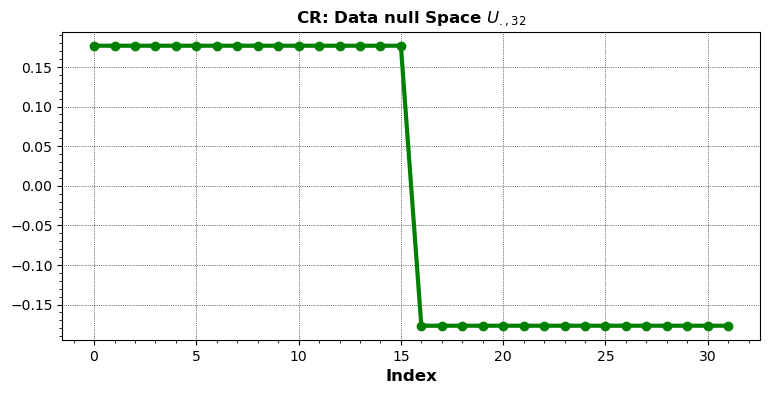

In [9]:
#================ The travel time data for the data null space vector
plt.figure(figsize=(9, 4))
# plt.subplot(121)
plt.plot(u[:,31], '-' ,linewidth=3, marker= 'o', c="g")
plt.title(r'CR: Data null Space $U_{.,32}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Above are the two plot for the sample elements of the data null space vector, which is $32^{th}$ column in $U$ from the SVD of G. This sample element cannot be fitted by any model.

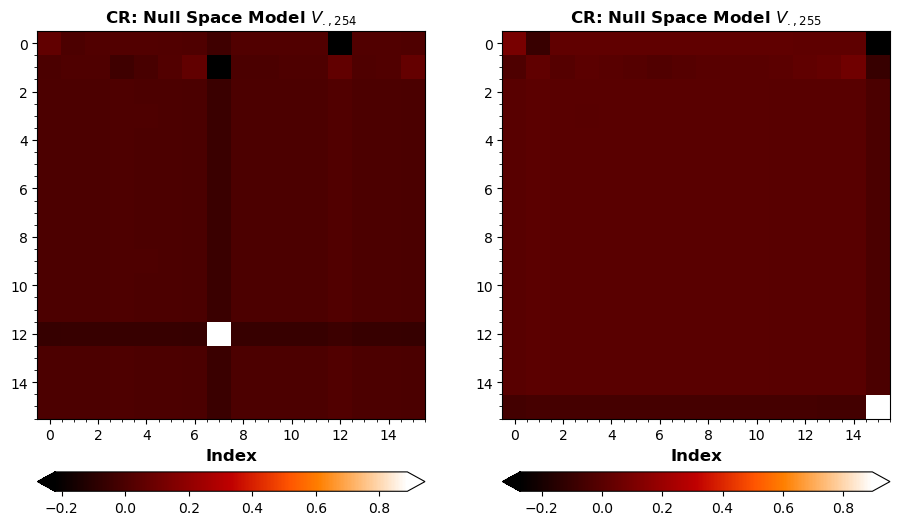

In [10]:
#================ The travel time data for the data null space vector
plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.imshow(vh[:,199].reshape((16,16)), cmap="gist_heat")
plt.colorbar( orientation='horizontal', shrink=1,extend='both', pad=0.099) 
plt.title(r'CR: Null Space Model $V_{.,254}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.subplot(122)
plt.imshow(vh[:,255].reshape((16,16)), cmap="gist_heat")
plt.colorbar( orientation='horizontal', shrink=1,extend='both', pad=0.099) 
plt.title(r'CR: Null Space Model $V_{.,255}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Above are the two plot for the for the sample elements of the model null space vector, which is the $255^{th}$ and $256^{th}$ column in $V$ from the SVD of G.

### (ii) Contour or otherwise display a nonzero model that  fits the trivial data set exactly.

We have 225 vectors in the model null space. This means a linear combination of these 225 vectors will fit the trivial data exactly. Hence, we have chosen to display $200\times V_{.,200}$. This means that the coefficients of other vectors in `N(G)` has been set to `0`. 

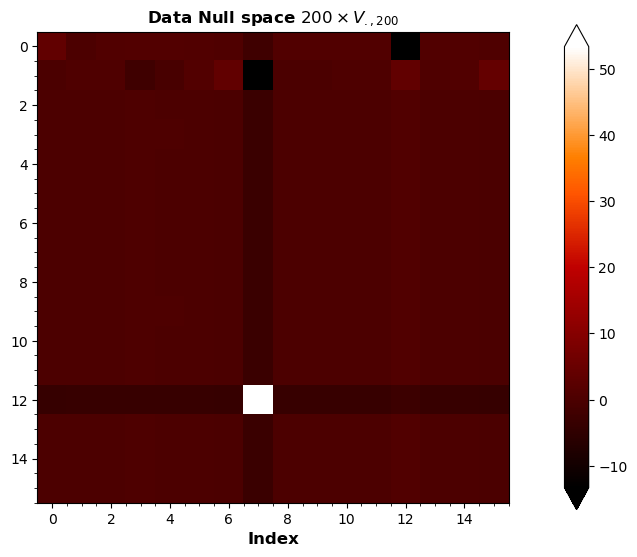

In [11]:
#=========================== sample model that fits the trivial data exactly 
plt.figure(figsize=(8, 7)) 

plt.imshow(60*vh[:,199].reshape(16,16), cmap="gist_heat")
plt.colorbar( orientation='vertical', shrink=.9,extend='both', pad=0.09) 
plt.title(r'Data Null space $200 \times V_{.,200}$',fontweight='bold', fontsize = 12) 
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.show()

Figure above shows s sample model that fits the trivial data exactly.

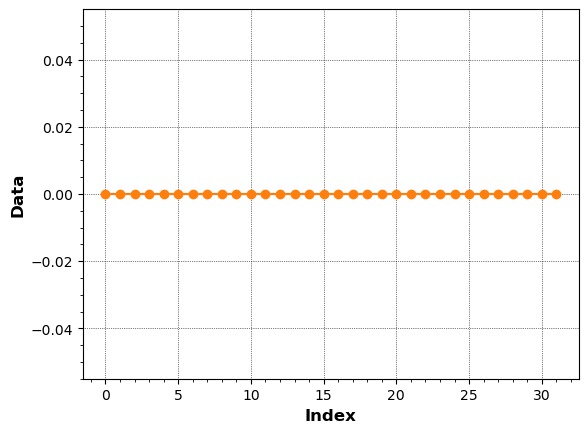

In [12]:
#===========================  Trivial data Vs. trivial model predictions 
trivial_model = 60*vh[:,199]
pred = G@trivial_model

plt.plot(np.zeros(32), label = 'Trivial data') 
plt.plot(pred.round(2),  '-' 'o' ,label = 'Predictionfrom trivial model') 
plt.ylabel("Data",fontweight='bold', fontsize = 12) 
plt.xlabel("Index",fontweight='bold', fontsize = 12) 
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

The figure above shows the comfirmation purpose plot, the predictions from the trivial model and trivial data. 

### b) (iii) 
### Show the model resolution by displaying the 256 diagonal elements of the model resolution matrix,           reshaped into an appropriate 16 by 16 grid. Note if there are any model parameters that have perfect resolution.


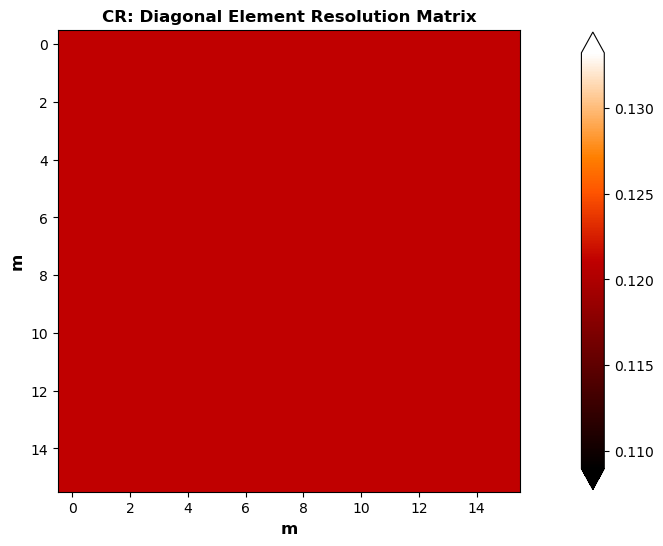

Model resolution minimum: 0.12109
Model resolution maximum: 0.12109


In [13]:
#============== Resolution matrix
res_matrix = np.round((np.diag(vp@vp.T).reshape(16,16)),5)

#============== Reshaped diagonal elements of the model resolution matrix 
plt.figure(figsize=(8, 6))
plt.imshow(res_matrix, cmap="gist_heat")
plt.colorbar( orientation='vertical', shrink=0.99,extend='both', pad=0.099) 
plt.title("CR: Diagonal Element Resolution Matrix",fontweight='bold', fontsize = 12)
plt.xlabel('m',fontweight='bold', fontsize = 12)
plt.ylabel('m',fontweight='bold', fontsize = 12)
plt.show()

#================ Largest and Smallest Diagonal Values 
print('Model resolution minimum: %s' % np.diag(res_matrix).min())
print('Model resolution maximum: %s' % np.diag(res_matrix).max())

All the model parameters have perfect resolution  of `0.12109` in the diagonal resolutional matrix diagonal.

In [35]:
np.trace(res_matrix)

1.93744

### (c)

### Produce a 16 by 16 element contour or other plot of your slowness perturbation model, displaying the maximum and minimum slowness perturbations in the title of the plot. Interpret any internal structures geometrically and in terms of seismic velocity (in m/s).

In [14]:
#================ Generalized Inverse
G_inv = vp@np.linalg.inv(lamp)@up.T

#=============== m-dagger
m_dag = G_inv@d

#================ Rank of Generalized Inverse
print('Rank of the generalized inverse matrix is:', np.linalg.matrix_rank(G_inv))

Rank of the generalized inverse matrix is: 31


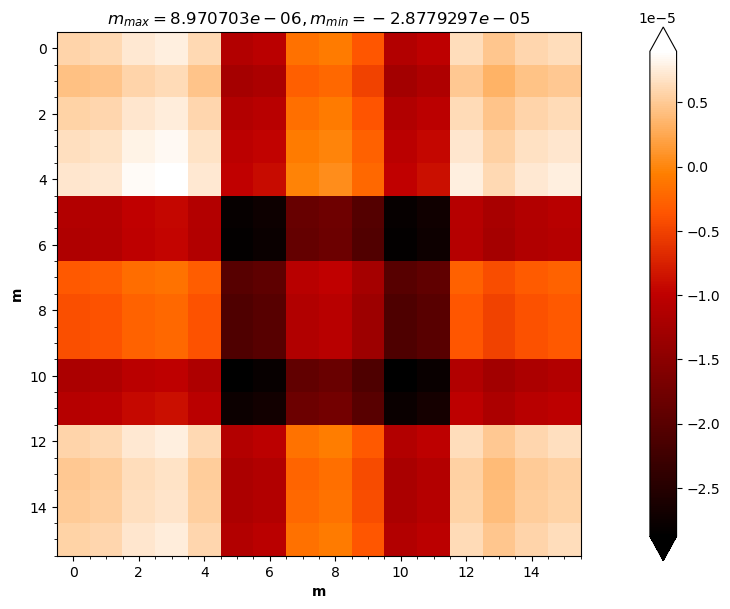

In [15]:
#=============== Solution to a grid of slowness
plt.figure(figsize=(9, 7))
plt.imshow(m_dag.reshape(16, 16), cmap="gist_heat")
plt.colorbar( orientation='vertical', shrink=0.99,extend='both', pad=0.099)
plt.title(r'$m_{max} = %s,  m_{min} = %s$' % (np.round(np.max(m_dag),12), np.round(np.min(m_dag),12)),fontweight='bold', fontsize = 12)
plt.xlabel('m',fontweight='bold')
plt.ylabel('m',fontweight='bold')
plt.minorticks_on()
plt.show()

The consistency observed in the model resolution matrix is a result of the geometrical resemblance shared by all ray path configurations. Specifically, each block exhibits a uniform pattern of only two ray paths that intersect perpendicularly through it.

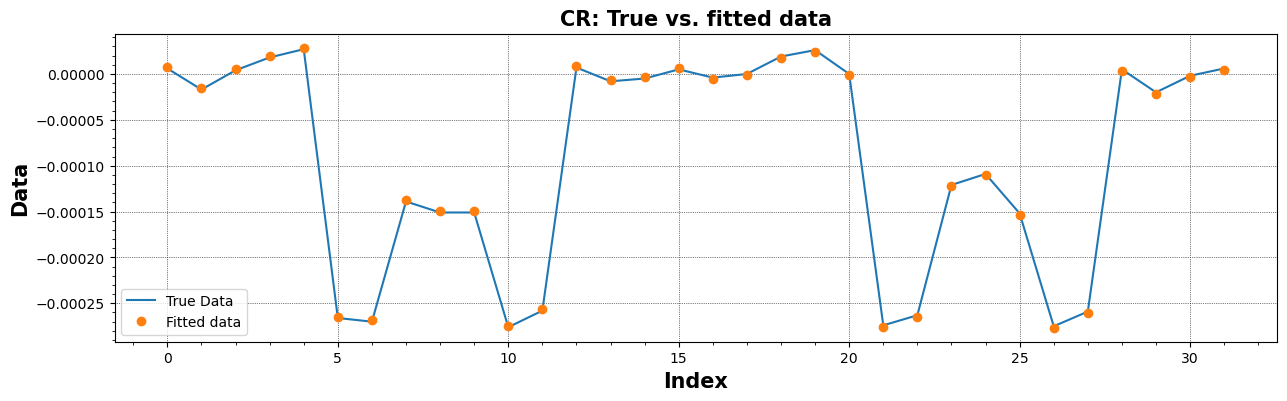

In [16]:
#===============  True vs. fitted data
fit = G@m_dag

plt.figure(figsize=(15, 4))
plt.plot(d, label = 'True Data')
plt.plot(fit, 'o' ,label = 'Fitted data',linewidth=3)
plt.title("CR: True vs. fitted data",fontweight='bold', fontsize = 15)
plt.ylabel("Data",fontweight='bold', fontsize = 15)
plt.xlabel("Index",fontweight='bold', fontsize = 15)
plt.legend()
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Figure above shows the trivial data Vs. trivial model predictions. 

## (B) Complete Data Set (Full Row, Column and Diagonal Scan)

In [17]:
#==================== load the data
diag1scan_ = loadmat('diag1scan.mat')['diag1scan']
diag2scan_ = loadmat('diag2scan.mat')['diag2scan']
colscan_ = loadmat('colscan.mat')['colscan']
rowscan_ = loadmat('rowscan.mat')['rowscan']

#==================== Extract travel time measurements
d_ = np.concatenate((colscan[:, 4],rowscan[:, 4], diag1scan_[:, 4], diag2scan_[:, 4]),axis = 0).T

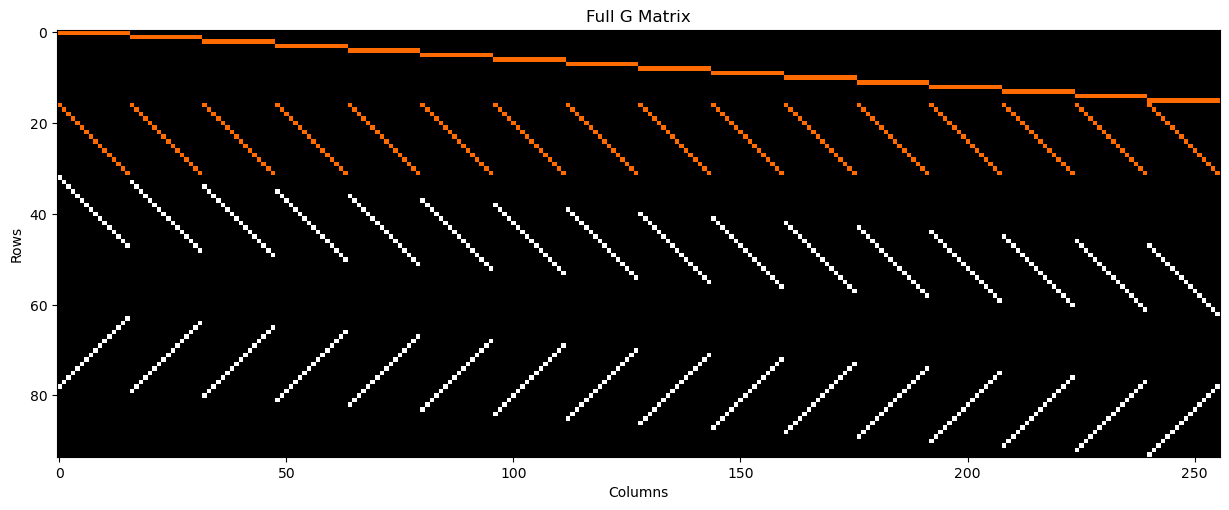

Rank of G matrix: 87


In [18]:
#========================= Designing G Matrix =================================#
G_ = np.zeros((94,256))


#=============================================== Row and Column Scan G Matrix
#==================== row scan
for i in range(1,17):
    for j in range((i-1)*16,i*16):
        G_[i-1, j] = 1

#==================== column scan
for i in range(1,17):
    for j in range(i-1,240+i,16):
        G_[i+15, j] = 1

#=============================================== Diagonal 1 Scan G Matrix
for i in range(1,17):
    for j in range(i):
        G_[i+31, i+j*15-1] = np.sqrt(2)

for i in range(1,16):
    for j in range(16 - i):
        G_[i+47, (i+1)*16+j*15-1] = np.sqrt(2)

#=============================================== Diagonal 2 Scan G Matrix
for i in range(1,17):
    for j in range(i):
        G_[i+62, 16-i+17*j] = np.sqrt(2)

for i in range(1, 16):
    for j in range(16-i):
        G_[i+78, (i*16)+17*j] = np.sqrt(2)
        
#========================= Plotting the G matrix        
plt.figure(figsize=(15, 10))
plt.imshow(G_,cmap="gist_heat")
plt.title("Full G Matrix")
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

print("Rank of G matrix:", np.linalg.matrix_rank(G_))

### (a) Rank and Dimension 

In [19]:
#================ rank of G and Dimension of d 
len_d_ = len(d_)
print('Rank of G matrix is:', np.linalg.matrix_rank(G_))
print('Dimension of G matrix is:',  (G_.shape))
print('Dimension of data space is: %s' % (len_d_))

Rank of G matrix is: 87
Dimension of G matrix is: (94, 256)
Dimension of data space is: 94


- The rank of `94 x 256` element `G` matrix is `87`. Hence, the matrix `G` is rank deficient.

### b) (i)

### Significance of the elements and dimensiom of the data and model null spaces.  Plot and interpret at least one element of each space.

In [20]:
#================ SVD of G
u_, s_, vh_ = np.linalg.svd(G_, full_matrices= True)
vh_ = vh_.T
#================ P and null spaces from u, s and vh
p_ = np.linalg.matrix_rank(np.diag(s_))
n_ = G_.shape[0]
m_ = G_.shape[1]
up_ = u_[:, :p_]
vp_ = vh_[:,:p_]
lamp_ = np.diag(s_[:p_])

In [21]:
print('vp: %s' % vp_)
print('up: %s' % up_)
print('lamp: %s' % lamp_)

vp: [[-0.05198112  0.0590867  -0.15652261 ... -0.25363901 -0.16063093
  -0.45917184]
 [-0.05198112 -0.05341252  0.02416549 ... -0.02704219  0.01845628
   0.03588131]
 [-0.05198112  0.04935035  0.02416549 ... -0.02704219  0.01845628
  -0.0200436 ]
 ...
 [-0.05198112  0.04935035 -0.01563649 ...  0.00384248 -0.08755962
  -0.0200436 ]
 [-0.05198112 -0.05341252 -0.01563649 ...  0.00384248 -0.08755962
   0.03588131]
 [-0.05198112  0.0590867  -0.20169527 ...  0.41603697  0.64435431
  -0.45917184]]
up: [[-9.55375971e-02  1.92502153e-16  3.98492938e-17 ... -7.87157778e-17
  -2.76534351e-18 -1.03421041e-17]
 [-1.02840915e-01 -7.54744571e-16  1.40721273e-02 ...  3.82434294e-02
  -2.61011169e-02 -3.48541361e-16]
 [-1.09100902e-01 -4.27514678e-16  2.51287988e-02 ...  2.73122336e-02
  -3.71204652e-02 -7.69131915e-17]
 ...
 [-2.60709775e-02 -3.44662612e-02 -3.84987376e-02 ...  4.05407099e-02
  -1.40466423e-01 -1.05078967e-02]
 [-1.68888207e-02  2.26659187e-02  3.47491516e-03 ...  5.55189569e-02
  -1.

In [22]:
#================ Largest and Smallest Singular Values 
print('Smallest singular value: %s' % np.diag(lamp_).min())
print('Largest singular value: %s' % np.diag(lamp_).max())

Smallest singular value: 1.3574214960160653
Largest singular value: 8.705451624062913


In [23]:
#================ dimension of P space
print('Dimension of P space: %s' % (p_))

#================ dimension of data null space 
print('Dimension of data null space: %s' % (len_d_ - p_))

#================ dimension of model null space 
print('Dimension of model null space: %s' % (m_ - p_))

Dimension of P space: 87
Dimension of data null space: 7
Dimension of model null space: 169


`Significance`: Null space is important in inverse problems because the existence of nontrivial null space results in the existence of nonunique solutions. Both the model null space and the data null space in our scenario are not empty.
- Model Null Space (`N(G)`): The set of all vectors with `m` such that `Gm = 0` is known as model null space (`N(G)`). The existence of vectors other than the zero vector (`m = 0`) that perfectly fit the trivial data (`d = 0`) indicates that the model null space is not trivial.

- Data Null Space (`N(G.T)`): A collection of vectors `d` that do not affect `m` constitute the data null space. So, whenever a nontrivial (non-empty) data null space exists, it indicates that additional data exist that will result in the same model parameters.


- The data null space is 7-dimensional. Hence, there exists 7 vectors $\mathbf{u}$. $\mathbf{u}_{.,88}$ not in the column space of `G` matrix. These vectors denote the projections of the data that cannot be fitted by any model.

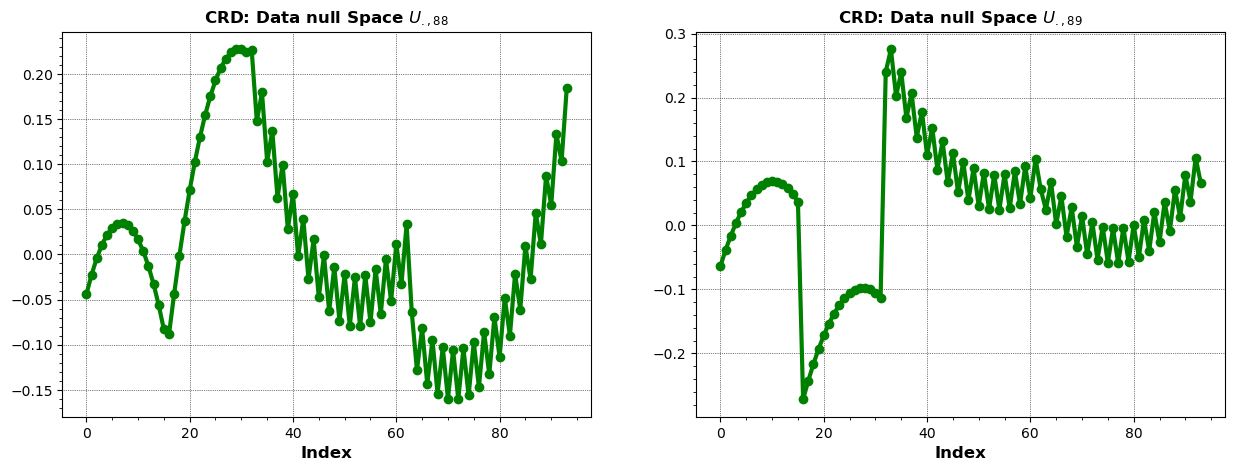

In [24]:
#================ The travel time data for the data null space vector
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(-u_[:,87], '-' ,linewidth=3, marker= 'o', c="g")
plt.title(r'CRD: Data null Space $U_{.,88}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.subplot(122)
plt.plot(u_[:,88], '-' ,linewidth=3, marker= 'o', c="g")
plt.title(r'CRD: Data null Space $U_{.,89}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Above are the two plot for the for the sample elements of the data null space vector, which is the $88^{th}$ and $89^{th}$ column in $U$ from the SVD of G. This sample element cannot be fitted by any model.

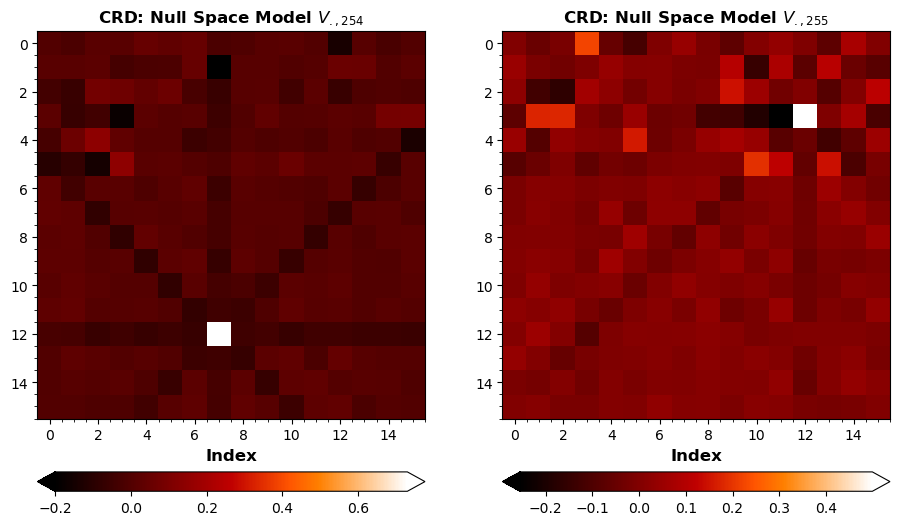

In [25]:
#================ The travel time data for the data null space vector
plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.imshow(vh_[:,199].reshape((16,16)), cmap="gist_heat")
plt.colorbar( orientation='horizontal', shrink=1,extend='both', pad=0.099) 
plt.title(r'CRD: Null Space Model $V_{.,254}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.subplot(122)
plt.imshow(vh_[:,255].reshape((16,16)), cmap="gist_heat")
plt.colorbar( orientation='horizontal', shrink=1,extend='both', pad=0.099) 
plt.title(r'CRD: Null Space Model $V_{.,255}$' ,fontweight='bold', fontsize = 12)
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Above are the two plot for the for the sample elements of the model null space vector, which is the $254^{th}$ and $255^{th}$ column in $V$ from the SVD of G.

### (ii) Contour or otherwise display a nonzero model that  fits the trivial data set exactly.

We have 169 vectors in the model null space. This means a linear combination of these 169 vectors will fit the trivial data exactly. Hence, we have chosen to display $200\times V_{.,200}$. This means that the coefficients of other vectors in `N(G)` has been set to `0`. 

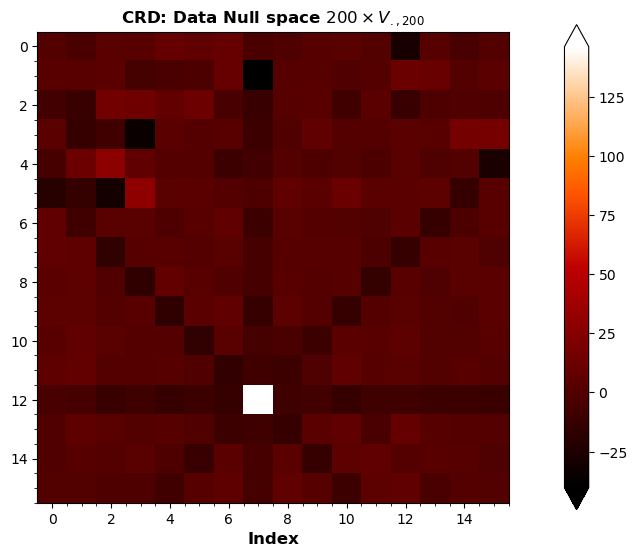

In [26]:
#=========================== sample model that fits the trivial data exactly 
plt.figure(figsize=(8, 7)) 

plt.imshow(200*vh_[:,199].reshape(16,16), cmap="gist_heat")
plt.colorbar( orientation='vertical', shrink=.9,extend='both', pad=0.09) 
plt.title(r'CRD: Data Null space $200 \times V_{.,200}$',fontweight='bold', fontsize = 12) 
plt.xlabel("Index",fontweight='bold',fontsize=12)
plt.minorticks_on()
plt.show()

Figure above shows s sample model that fits the trivial data exactly.

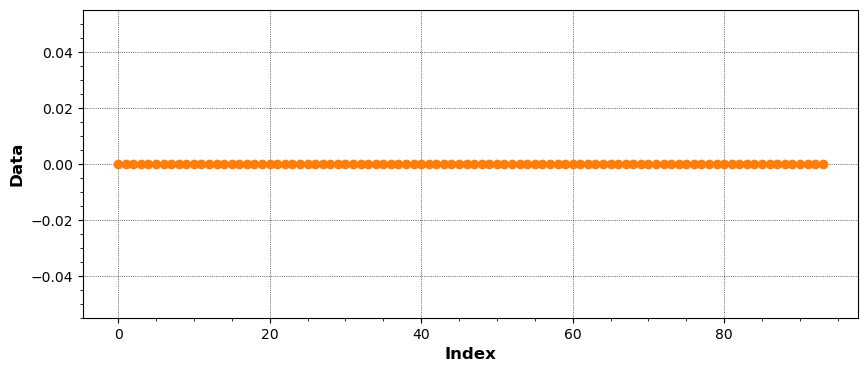

In [27]:
#===========================  Trivial data Vs. trivial model predictions 
trivial_model_ = 200*vh_[:,199]
pred_ = G_@trivial_model_
plt.figure(figsize=(10, 4)) 
plt.plot(np.zeros(32), label = 'Trivial data') 
plt.plot(pred_.round(2),  '-' 'o' ,label = 'Predictionfrom trivial model') 
plt.ylabel("Data",fontweight='bold', fontsize = 12) 
plt.xlabel("Index",fontweight='bold', fontsize = 12) 
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

The figure above shows the comfirmation purpose plot, the predictions from the trivial model and trivial data. 

### b) (iii) 
### Show the model resolution by displaying the 256 diagonal elements of the model resolution matrix,           reshaped into an appropriate 16 by 16 grid. Note if there are any model parameters that have perfect resolution.


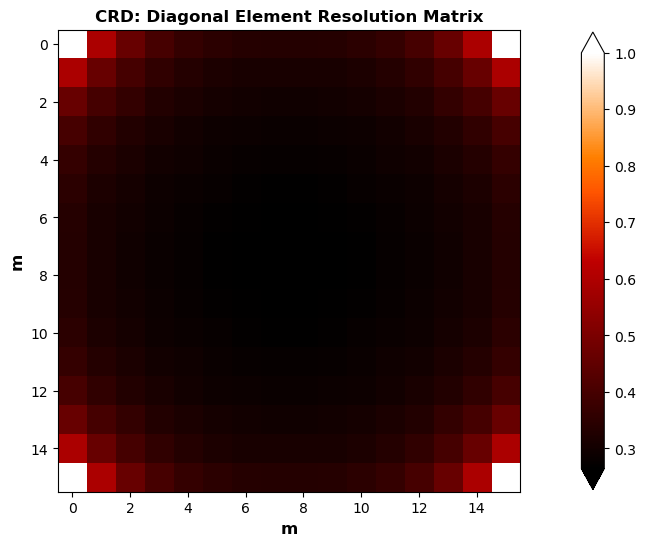

Model resolution minimum: 0.26661
Model resolution maximum: 1.0


In [28]:
#============== Resolution matrix
res_matrix_ = np.round((np.diag(vp_@vp_.T).reshape(16,16)),5)

#============== Reshaped diagonal elements of the model resolution matrix 
plt.figure(figsize=(8, 6))
plt.imshow(res_matrix_, cmap="gist_heat")
plt.colorbar( orientation='vertical', shrink=0.99,extend='both', pad=0.099) 
plt.title("CRD: Diagonal Element Resolution Matrix",fontweight='bold', fontsize = 12)
plt.xlabel('m',fontweight='bold', fontsize = 12)
plt.ylabel('m',fontweight='bold', fontsize = 12)
plt.show()

#================ Largest and Smallest Diagonal Values 
print('Model resolution minimum: %s' % np.diag(res_matrix_).min())
print('Model resolution maximum: %s' % np.diag(res_matrix_).max())

Figure above shows reshaped diagonal elements of the model resolution matrix. Due to the increase in the number of the ray paths, the diagonal of the model resolution matrix now exhibits variability when compared to the Row and Column in part A. The Figure above shows some perfect resolutions on the four corners os the spatial figure.

In [34]:
np.trace(res_matrix_)

6.5075400000000005

### c)

### Produce a 16 by 16 element contour or other plot of your slowness perturbation model, displaying the maximum and minimum slowness perturba- tions in the title of the plot. Interpret any internal structures geometrically and in terms of seismic velocity (in m/s).

In [29]:
#================ Generalized Inverse
G_inv_ = vp_@np.linalg.inv(lamp_)@up_.T

#=============== m-dagger
m_dag_ = G_inv_@d_

#================ Rank of Generalized Inverse
print('Rank of the generalized inverse matrix is:', np.linalg.matrix_rank(G_inv_))

Rank of the generalized inverse matrix is: 87


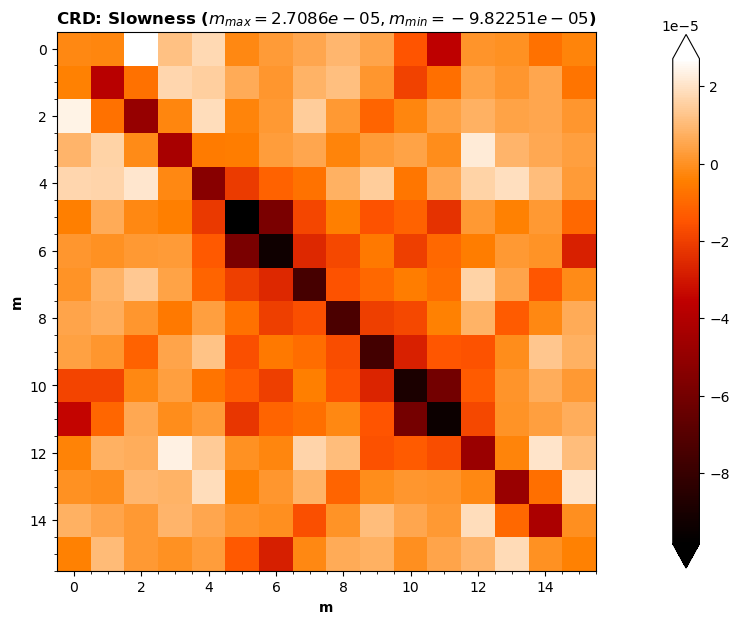

In [37]:
#=============== Solution to a grid of slowness
plt.figure(figsize=(10, 7))
plt.imshow(m_dag_.reshape(16, 16), cmap="gist_heat")
# plt.contour(m_dag_.reshape(16, 16), cmap="bone")
plt.colorbar( orientation='vertical', shrink=0.99,extend='both', pad=0.099)
plt.title(r'CRD: Slowness ($m_{max} = %s,  m_{min} = %s$)' % (np.round(np.max(m_dag_),10), np.round(np.min(m_dag_),10)),fontweight='bold', fontsize = 12)
plt.xlabel('m',fontweight='bold')
plt.ylabel('m',fontweight='bold')
plt.minorticks_on()
plt.show()

The Slowness solution indicates the presence of a high-velocity body oriented diagonally within the interior of the slab.

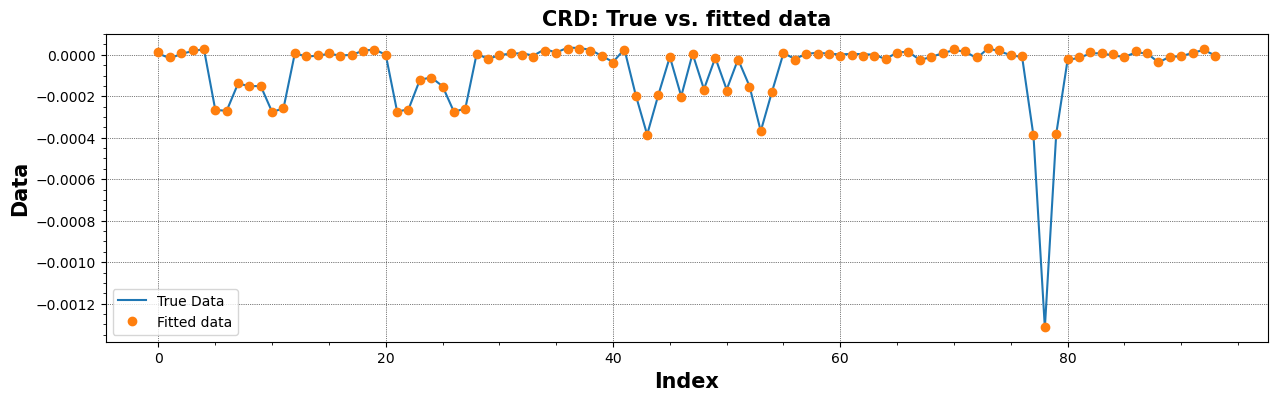

In [31]:
#===============  True vs. fitted data
fit_ = G_@m_dag_

plt.figure(figsize=(15, 4))
plt.plot(d_, label = 'True Data')
plt.plot(fit_, 'o' ,label = 'Fitted data',linewidth=3)
plt.title("CRD: True vs. fitted data",fontweight='bold', fontsize = 15)
plt.ylabel("Data",fontweight='bold', fontsize = 15)
plt.xlabel("Index",fontweight='bold', fontsize = 15)
plt.legend()
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

Figure above shows the trivial data Vs. trivial model predictions. 